In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

In [3]:
#한글깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data = pd.read_csv("건강검진정보(2017).csv")

In [5]:
data.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [6]:
data.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

- Many variables are incomplete. Fill them in various ways.
- Drop the ones that are too lacking, i.e. "치아우식증유무", "결손치유무", "치아마모증유무", "제3대구치(사랑니)이상", "치석".
- Drop useless ones, i.e. "기준년도", "데이터공개일자".
- For the variables that are closely related to weight, i.e. "허리둘레", "수축기혈압", "이완기혈압", "식전혈당(공복혈당)", "총콜레스테롤", "트리글리세라이드",
"HDL콜레스테롤", "LDL콜레스테롤", "혈색소" fill the NaNs with means of the variable within each weight range that the sample falls in.
- Categorical variables such as "요단백", "흡연상태", "음주여부", "청력(좌),(우)" can be filled with mode, as missing data size is negligible.
- Variables closely related to liver condition, "(혈청지오티)AST", "(혈청지오티)ALT", "감마지티피", can be filled with means within each categories of 음주여부 as
liver condition is dependent on alcohol consumption.
- For 시력(좌) & (우), and "혈청크레아티닌", fill NaN with their respective means as there are no other information.

In [7]:
#drop unnecessary columns and columns that are too incomplete
data = data.drop(["기준년도", "치아우식증유무", "결손치유무", "치아마모증유무", "제3대구치(사랑니)이상", "치석", "데이터공개일자"], axis = 1)
data.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,1,1,8,43,170,75,90.0,1.0,1.0,1.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y
1,2,1,7,11,180,80,89.0,0.9,1.2,1.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,Y
2,3,1,9,41,165,75,91.0,1.2,1.5,1.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,N
3,4,1,11,48,175,80,91.0,1.5,1.2,1.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,Y
4,5,1,11,30,165,60,80.0,1.0,1.2,1.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,Y


In [8]:
#Variables that are closely related to weight
weightdependent = ["허리둘레", "수축기혈압", "이완기혈압", "식전혈당(공복혈당)", "총콜레스테롤", "트리글리세라이드", "HDL콜레스테롤", "LDL콜레스테롤", "혈색소"]
WV = data.groupby("체중(5Kg단위)")[weightdependent].mean()
WV

,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소
체중(5Kg단위),,,,,,,,,
25,67.911111,131.000000,72.444444,84.333333,172.111111,83.222222,48.666667,106.444444,9.666667
30,68.702924,125.251462,75.432749,99.140351,190.187135,107.023392,60.976608,107.520468,11.866082
35,66.037882,119.863681,72.714567,98.874016,189.672244,97.715551,63.625492,106.427586,12.490994
40,66.440440,116.060679,71.706765,94.918350,190.683918,91.526468,66.099905,106.170938,12.893087
45,68.969481,115.852590,71.728268,94.406980,191.999561,92.301906,65.541322,107.982019,13.058422
50,72.546955,117.589119,72.684977,95.718930,193.479016,99.331252,63.437199,110.270159,13.224509
55,76.404220,120.065476,74.108110,97.933843,194.350414,110.338142,60.610397,111.972166,13.522480
60,80.022422,122.242554,75.505712,100.351593,194.575267,123.311366,57.602463,112.758444,14.015832
65,82.999070,123.751518,76.756956,101.981394,195.120890,136.474740,55.061868,113.626307,14.526577


In [9]:
#Fill NaNs with mean of the variable wihtin that weight range
for v in weightdependent:
    for weightclass in sorted(data["체중(5Kg단위)"].unique()):
        data.loc[(data[v].isnull()) & (data["체중(5Kg단위)"] == weightclass), v] = WV[v][weightclass]

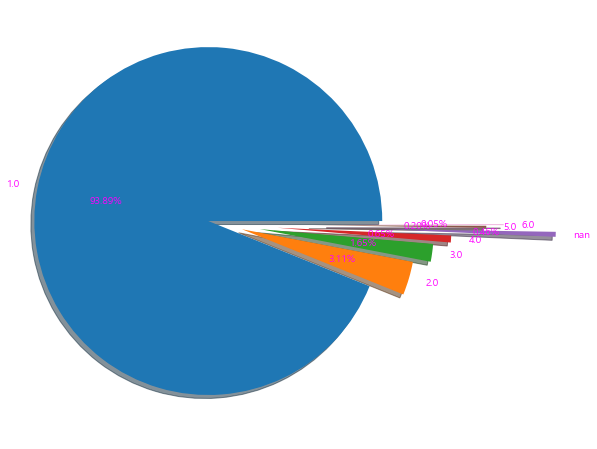

In [10]:
fig, ax = plt.subplots(figsize = (15, 8))
data["요단백"].value_counts(dropna = False).plot.pie(explode = [0.1, 0.1, 0.2, 0.3, 0.9, 0.5, 0.6], autopct = "%.2f%%", shadow = True,
                                                     textprops = dict(color = "magenta"))
ax.set_ylabel("")
plt.show()

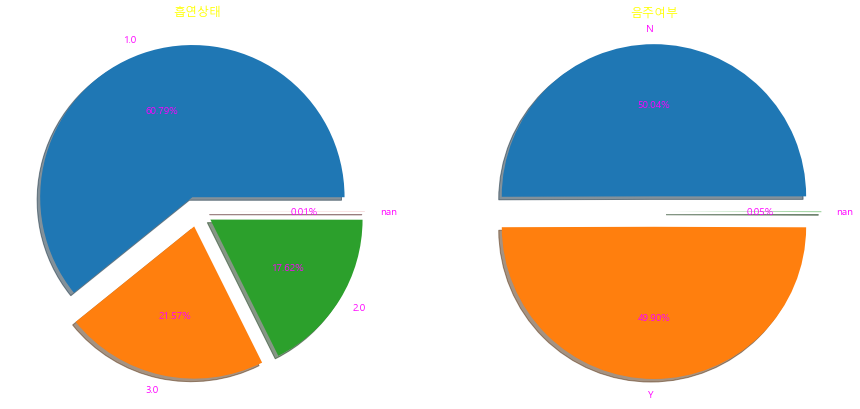

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
data["흡연상태"].value_counts(dropna = False).plot.pie(explode = [0.1, 0.1, 0.1, 0.1], autopct = "%.2f%%", shadow = True, ax = ax[0], textprops = dict(color = "magenta"))
data["음주여부"].value_counts(dropna = False).plot.pie(explode = [0.1, 0.1, 0.1], autopct = "%.2f%%", shadow = True, ax = ax[1], textprops = dict(color = "magenta"))
ax[0].set_title("흡연상태", c = "yellow", fontsize = "large")
ax[1].set_title("음주여부", c = "yellow", fontsize = "large")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
plt.show()

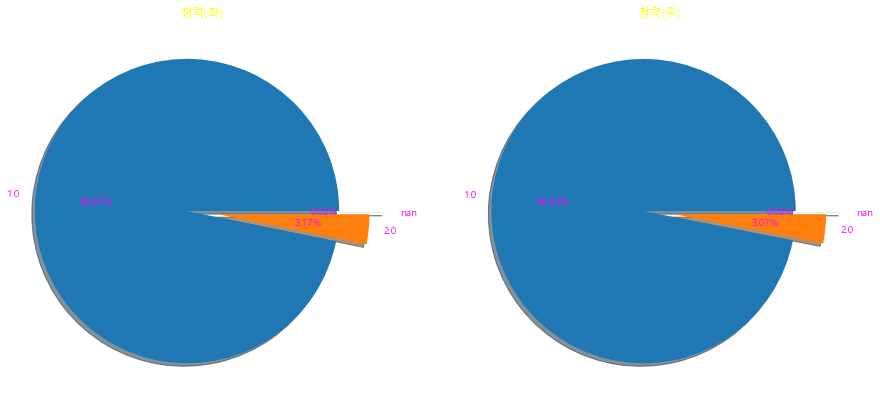

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
data["청력(좌)"].value_counts(dropna = False).plot.pie(explode = [0.1, 0.1, 0.2], autopct = "%.2f%%", shadow = True, ax = ax[0], textprops = dict(color = "magenta"))
data["청력(우)"].value_counts(dropna = False).plot.pie(explode = [0.1, 0.1, 0.2], autopct = "%.2f%%", shadow = True, ax = ax[1], textprops = dict(color = "magenta"))
ax[0].set_title("청력(좌)", c = "yellow", fontsize = "large")
ax[1].set_title("청력(우)", c = "yellow", fontsize = "large")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
plt.show()

In [13]:
#As shown in the pie charts above, NaN data in 요단백, 흡연상태, 음주여부, and 청력(좌)(우) is negligible. Replace them with mode.
data["요단백"].fillna(data["요단백"].mode()[0], inplace = True)
data["흡연상태"].fillna(data["흡연상태"].mode()[0], inplace = True)
data["음주여부"].fillna(data["음주여부"].mode()[0], inplace = True)
data["청력(좌)"].fillna(data["청력(좌)"].mode()[0], inplace = True)
data["청력(우)"].fillna(data["청력(우)"].mode()[0], inplace = True)

In [14]:
#Variables that are closely related to liver condition, which are heavily influenced by alcohol consumption
liverdependent = ["(혈청지오티)AST", "(혈청지오티)ALT", "감마지티피"]
LV = data.groupby("음주여부")[liverdependent].mean()
LV

,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
음주여부,,,
N,25.063064,24.085030,26.820328
Y,26.929913,27.420473,47.588675


In [15]:
#Fill NaNs with mean of the variable given that they imbibe or not
for v in liverdependent:
    for alcohol in sorted(data["음주여부"].unique()):
        data.loc[(data[v].isnull()) & (data["음주여부"] == alcohol), v] = LV[v][alcohol]

In [16]:
#Before filling Nans in "시력", 9.9 means loss of eyesight. Change it to 0.
data.loc[data["시력(좌)"] == 9.9, "시력(좌)"] = 0
data.loc[data["시력(우)"] == 9.9, "시력(우)"] = 0

In [17]:
#For "시력(좌)", "시력(우)", and "혈청크레아티닌", simply fill with mean
data["시력(좌)"].fillna(data["시력(좌)"].mean(), inplace = True)
data["시력(우)"].fillna(data["시력(우)"].mean(), inplace = True)
data["혈청크레아티닌"].fillna(data["혈청크레아티닌"].mean(), inplace = True)

In [18]:
data.isnull().sum()

가입자일련번호        0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
dtype: int64

- Target variables are "성별코드", and "연령대코드(5세단위)".
- For "성별코드", 1 means Male and 2 means Female.
- "연령대코드(5세단위)" has to be changed such that it is by units of 10 years, i.e. 2 means age 20 - 29, 3 means age 30 - 39, and so on.

In [19]:
sorted(data["연령대코드(5세단위)"].unique())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [20]:
#change "연령대코드(5세단위)" to "연령대코드(10세단위)", where the digit * 10 is the age range that the sample belongs to.
data["연령대코드(5세단위)"] = pd.cut(data["연령대코드(5세단위)"], 7, labels = [2, 3, 4, 5, 6, 7, 8])
data.rename(columns = {"연령대코드(5세단위)" : "연령대코드(10세단위)"}, inplace = True)
data.head()

,가입자일련번호,성별코드,연령대코드(10세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,1,1,3,43,170,75,90.0,1.0,1.0,1.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y
1,2,1,3,11,180,80,89.0,0.9,1.2,1.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,Y
2,3,1,4,41,165,75,91.0,1.2,1.5,1.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,N
3,4,1,5,48,175,80,91.0,1.5,1.2,1.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,Y
4,5,1,5,30,165,60,80.0,1.0,1.2,1.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,Y


Visualize data
- See how the target variables are related to other variables.

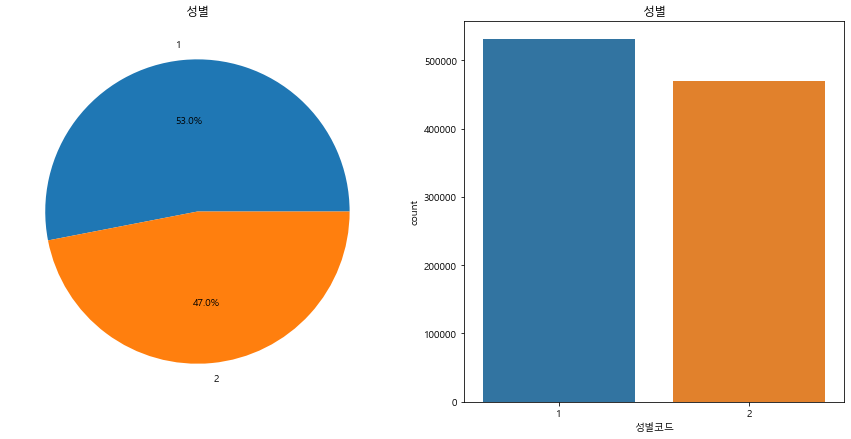

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data["성별코드"].value_counts().plot.pie(autopct = "%.1f%%", ax = ax[0])
ax[0].set_title("성별")
ax[0].set_ylabel("")
sns.countplot("성별코드", data = data, ax = ax[1])
ax[1].set_title("성별")
plt.show()

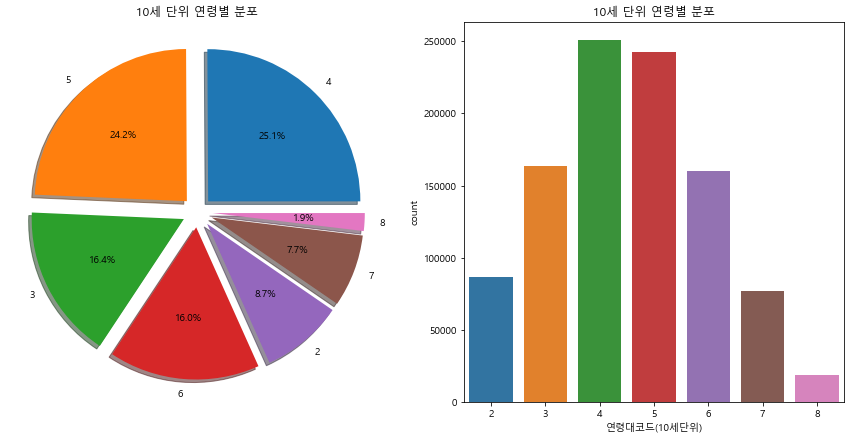

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data["연령대코드(10세단위)"].value_counts().plot.pie(explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct = "%.1f%%", ax = ax[0], shadow = True)
ax[0].set_title("10세 단위 연령별 분포")
ax[0].set_ylabel("")
sns.countplot("연령대코드(10세단위)", data = data, ax = ax[1])
ax[1].set_title("10세 단위 연령별 분포")
plt.show()

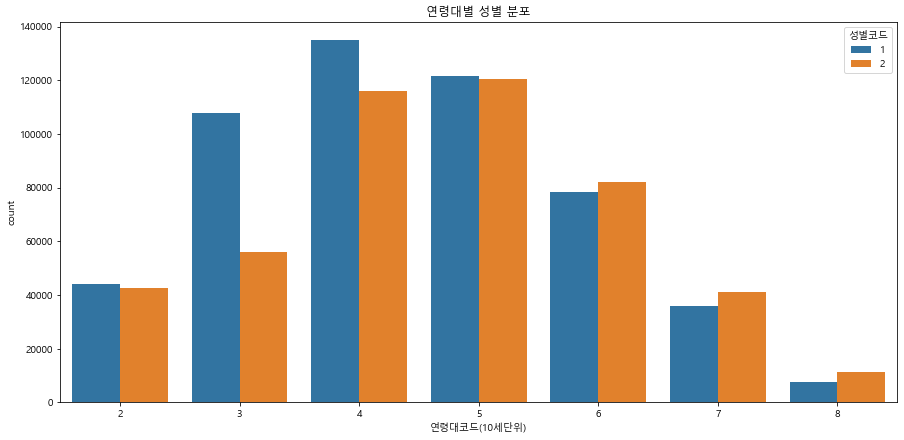

In [23]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot("연령대코드(10세단위)", hue = "성별코드", data = data)
ax.set_title("연령대별 성별 분포")
plt.show()

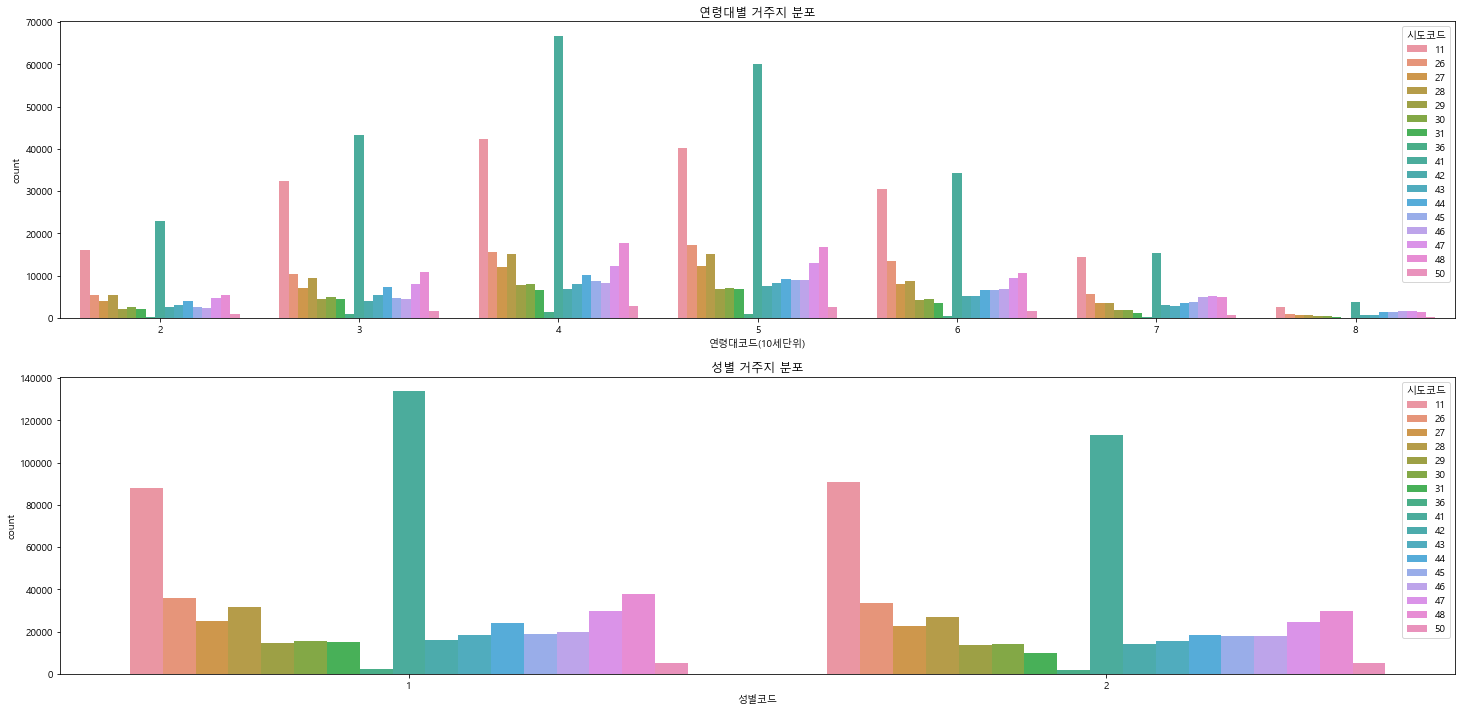

In [24]:
fig, ax = plt.subplots(2, 1, figsize = (25, 12))
sns.countplot("연령대코드(10세단위)", hue = "시도코드", data = data, ax = ax[0])
ax[0].set_title("연령대별 거주지 분포")
sns.countplot("성별코드", hue = "시도코드", data = data, ax = ax[1])
ax[1].set_title("성별 거주지 분포")
plt.show()

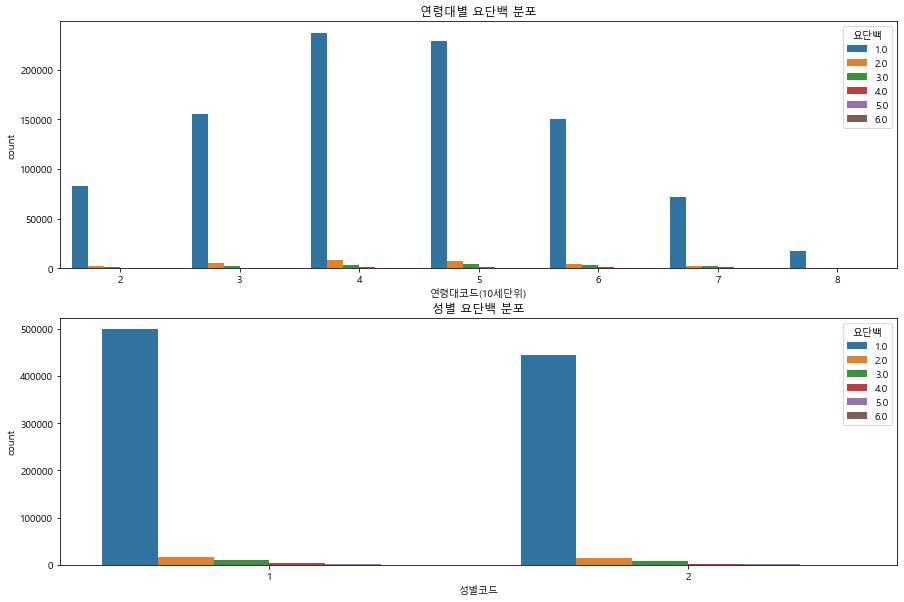

In [25]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.countplot("연령대코드(10세단위)", hue = "요단백", data = data, ax = ax[0])
ax[0].set_title("연령대별 요단백 분포")
sns.countplot("성별코드", hue = "요단백", data = data, ax = ax[1])
ax[1].set_title("성별 요단백 분포")
plt.show()

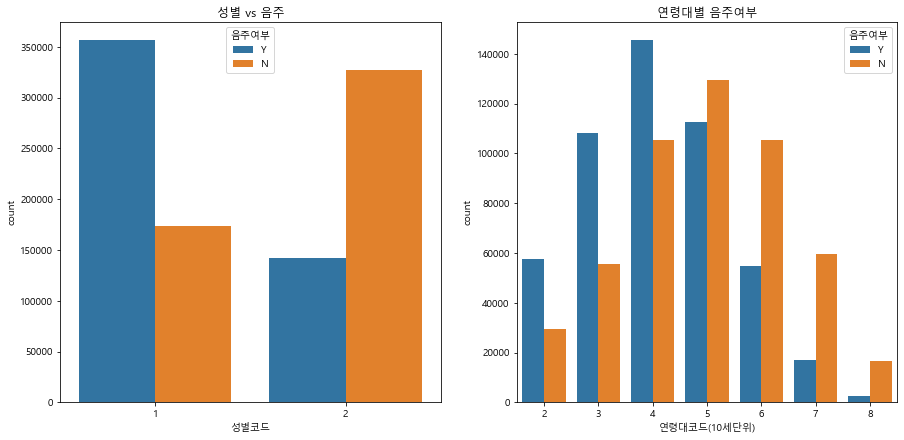

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot("성별코드", hue = "음주여부", data = data, ax = ax[0])
sns.countplot("연령대코드(10세단위)", hue = "음주여부", data = data, ax = ax[1])
ax[0].set_title("성별 vs 음주")
ax[1].set_title("연령대별 음주여부")
plt.show()

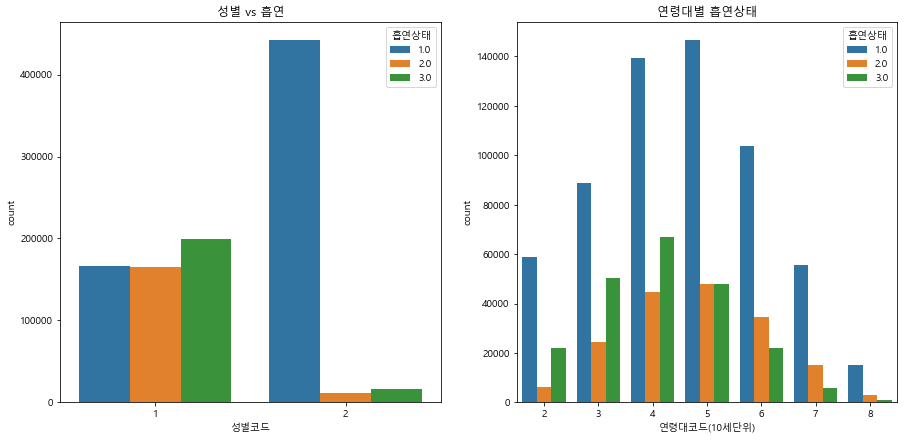

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot("성별코드", hue = "흡연상태", data = data, ax = ax[0])
sns.countplot("연령대코드(10세단위)", hue = "흡연상태", data = data, ax = ax[1])
ax[0].set_title("성별 vs 흡연")
ax[1].set_title("연령대별 흡연상태")
plt.show()

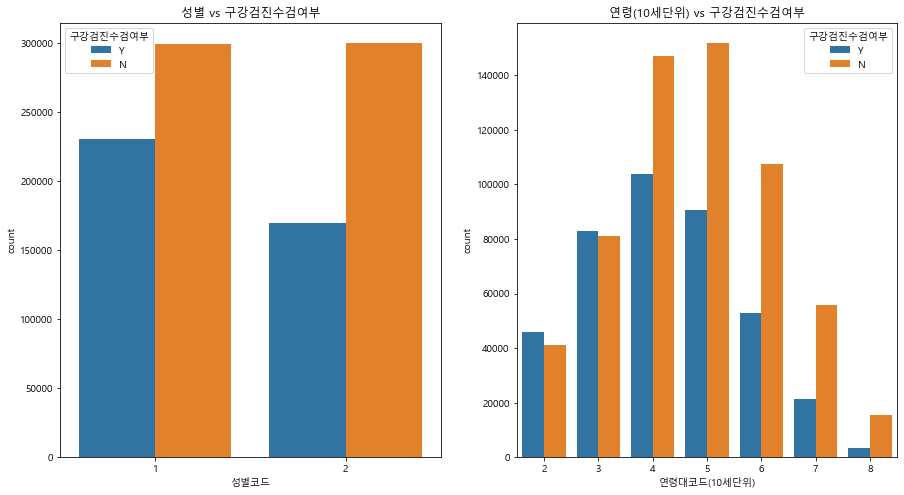

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot("성별코드", hue = "구강검진수검여부", data = data, ax = ax[0])
sns.countplot("연령대코드(10세단위)", hue = "구강검진수검여부", data = data, ax = ax[1])
ax[0].set_title("성별 vs 구강검진수검여부")
ax[1].set_title("연령(10세단위) vs 구강검진수검여부")
plt.show()

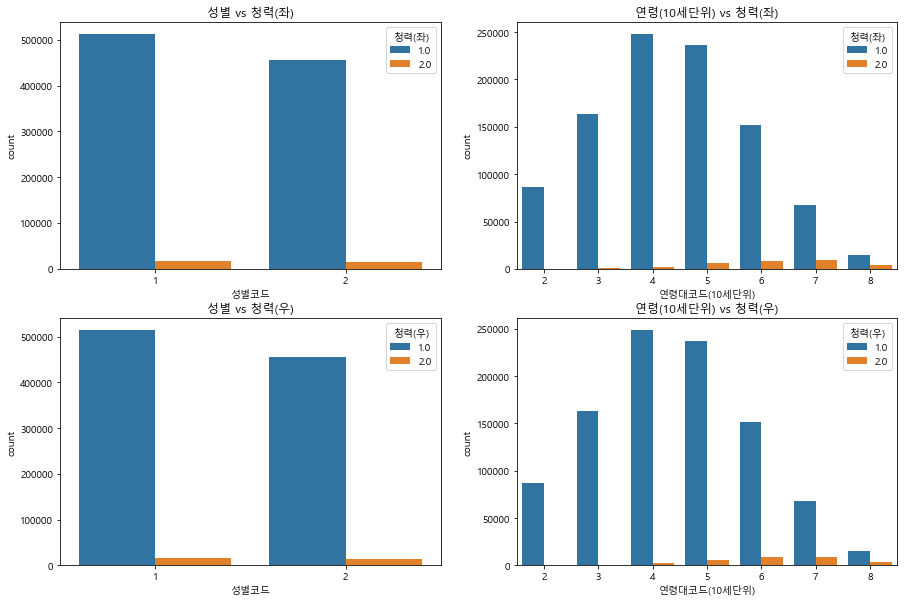

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.countplot("성별코드", hue = "청력(좌)", data = data, ax = ax[0, 0])
sns.countplot("연령대코드(10세단위)", hue = "청력(좌)", data = data, ax = ax[0, 1])
sns.countplot("성별코드", hue = "청력(우)", data = data, ax = ax[1, 0])
sns.countplot("연령대코드(10세단위)", hue = "청력(우)", data = data, ax = ax[1, 1])
ax[0, 0].set_title("성별 vs 청력(좌)")
ax[0, 1].set_title("연령(10세단위) vs 청력(좌)")
ax[1, 0].set_title("성별 vs 청력(우)")
ax[1, 1].set_title("연령(10세단위) vs 청력(우)")
plt.show()

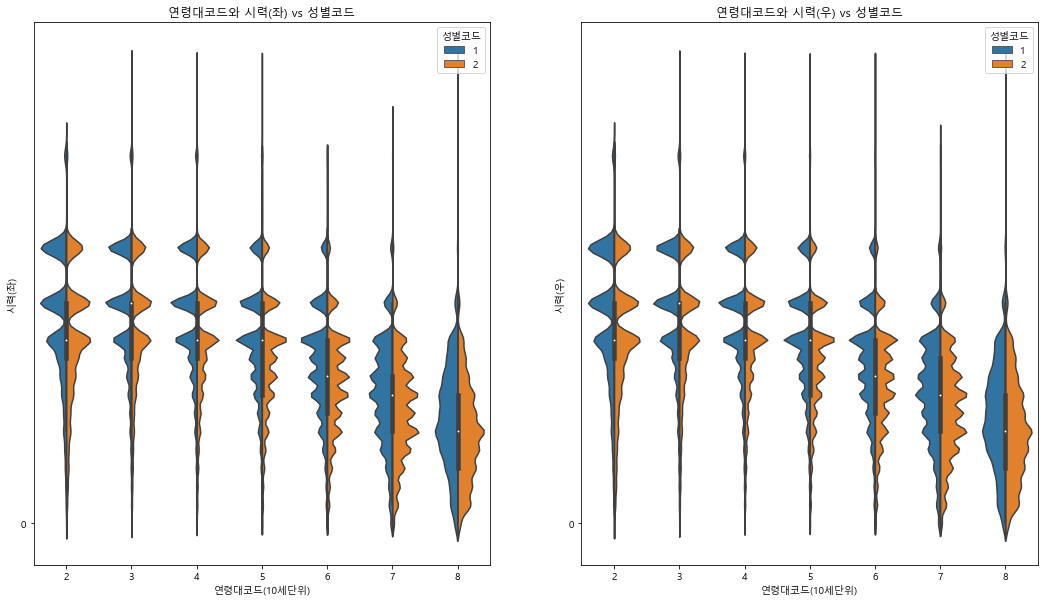

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
sns.violinplot("연령대코드(10세단위)", "시력(좌)", hue = "성별코드", data = data, split = True, ax = ax[0])
ax[0].set_title("연령대코드와 시력(좌) vs 성별코드")
ax[0].set_yticks(range(0, 3, 20))
sns.violinplot("연령대코드(10세단위)", "시력(우)", hue = "성별코드", data = data, split = True, ax = ax[1])
ax[1].set_title("연령대코드와 시력(우) vs 성별코드")
ax[1].set_yticks(range(0, 3, 20))
plt.show()

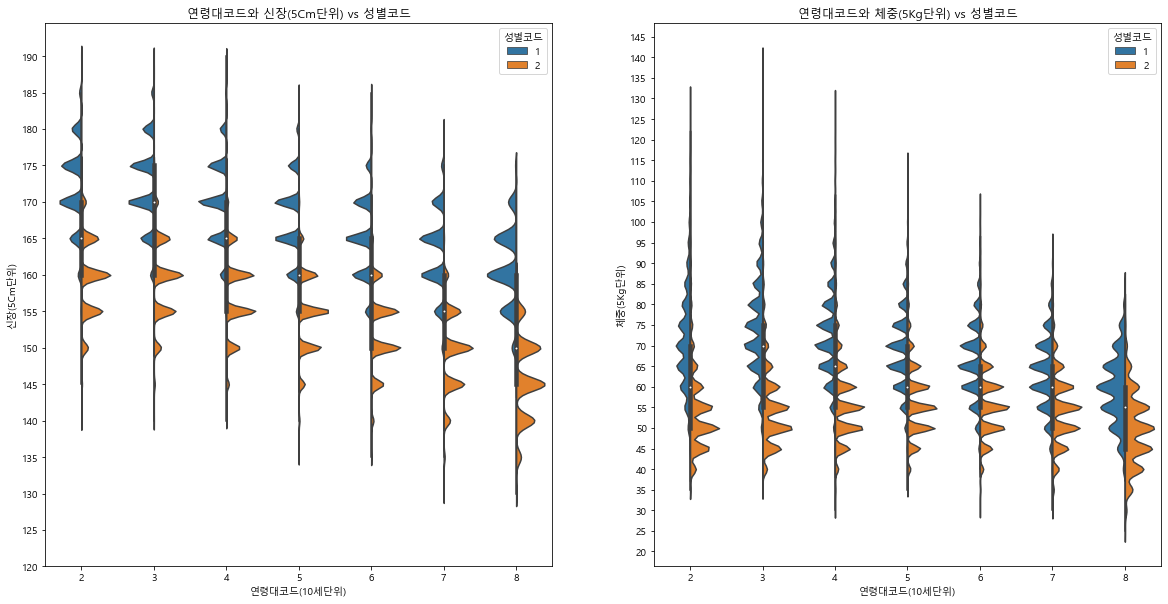

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.violinplot("연령대코드(10세단위)", "신장(5Cm단위)", hue = "성별코드", data = data, split = True, ax = ax[0])
ax[0].set_title("연령대코드와 신장(5Cm단위) vs 성별코드")
ax[0].set_yticks(range(120, 195, 5))
sns.violinplot("연령대코드(10세단위)", "체중(5Kg단위)", hue = "성별코드", data = data, split = True, ax = ax[1])
ax[1].set_title("연령대코드와 체중(5Kg단위) vs 성별코드")
ax[1].set_yticks(range(20, 150, 5))
plt.show()

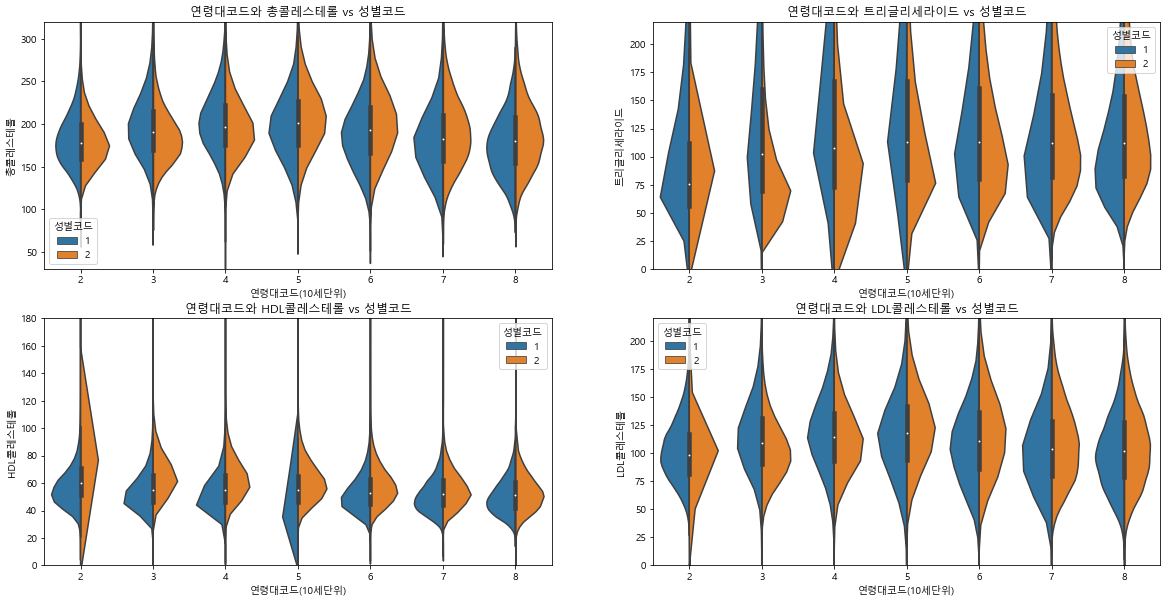

In [32]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
sns.violinplot("연령대코드(10세단위)", "총콜레스테롤", hue = "성별코드", data = data, split = True, ax = ax[0, 0])
ax[0, 0].set_title("연령대코드와 총콜레스테롤 vs 성별코드")
ax[0, 0].set_ylim(30, 320)

sns.violinplot("연령대코드(10세단위)", "트리글리세라이드", hue = "성별코드", data = data, split = True, ax = ax[0, 1])
ax[0, 1].set_title("연령대코드와 트리글리세라이드 vs 성별코드")
ax[0, 1].set_ylim(0, 220)

sns.violinplot("연령대코드(10세단위)", "HDL콜레스테롤", hue = "성별코드", data = data, split = True, ax = ax[1, 0])
ax[1, 0].set_title("연령대코드와 HDL콜레스테롤 vs 성별코드")
ax[1, 0].set_ylim(0, 180)

sns.violinplot("연령대코드(10세단위)", "LDL콜레스테롤", hue = "성별코드", data = data, split = True, ax = ax[1, 1])
ax[1, 1].set_title("연령대코드와 LDL콜레스테롤 vs 성별코드")
ax[1, 1].set_ylim(0, 220)

plt.show()

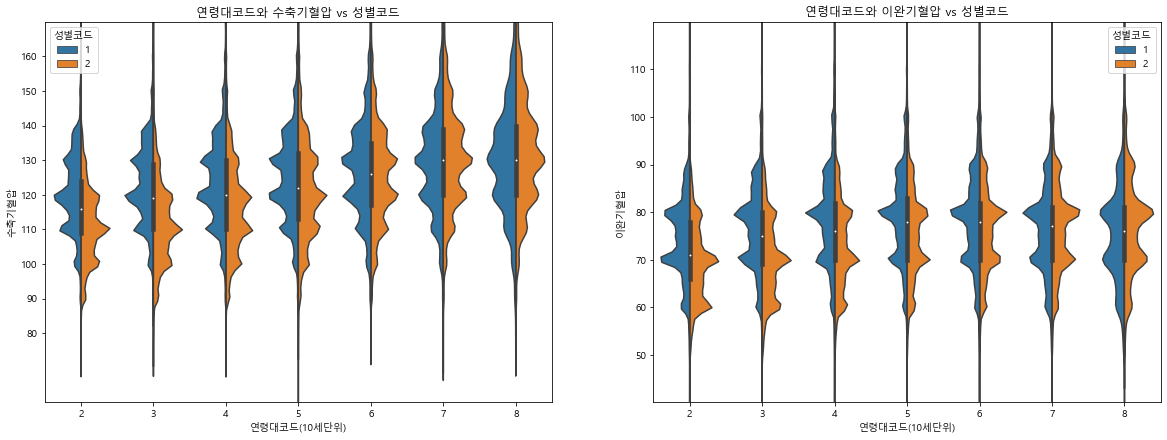

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.violinplot("연령대코드(10세단위)", "수축기혈압", hue = "성별코드", data = data, split = True, ax = ax[0])
ax[0].set_title("연령대코드와 수축기혈압 vs 성별코드")
ax[0].set_yticks(range(80, 170, 10))
ax[0].set_ylim(60, 170)

sns.violinplot("연령대코드(10세단위)", "이완기혈압", hue = "성별코드", data = data, split = True, ax = ax[1])
ax[1].set_title("연령대코드와 이완기혈압 vs 성별코드")
ax[1].set_yticks(range(50, 120, 10))
ax[1].set_ylim(40, 120)

plt.show()

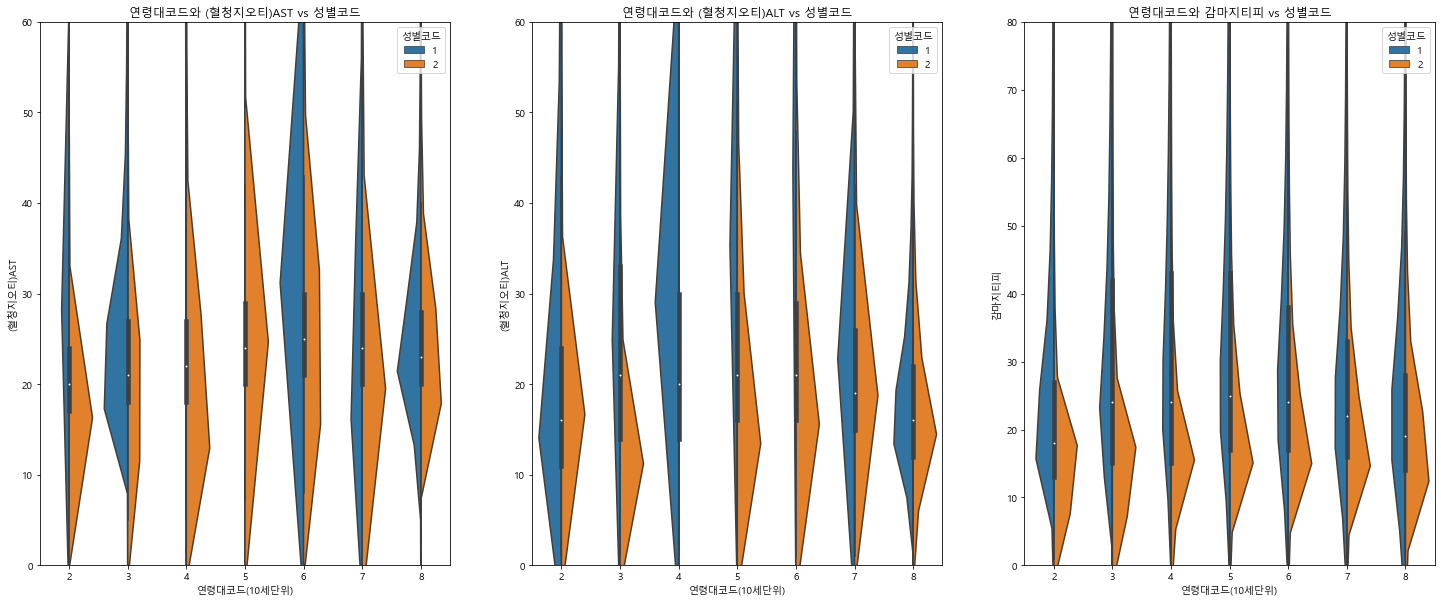

In [34]:
fig, ax = plt.subplots(1, 3, figsize = (25, 10))
sns.violinplot("연령대코드(10세단위)", "(혈청지오티)AST", hue = "성별코드", data = data, split = True, ax = ax[0])
ax[0].set_title("연령대코드와 (혈청지오티)AST vs 성별코드")
ax[0].set_ylim(0, 60)

sns.violinplot("연령대코드(10세단위)", "(혈청지오티)ALT", hue = "성별코드", data = data, split = True, ax = ax[1])
ax[1].set_title("연령대코드와 (혈청지오티)ALT vs 성별코드")
ax[1].set_ylim(0, 60)

sns.violinplot("연령대코드(10세단위)", "감마지티피", hue = "성별코드", data = data, split = True, ax = ax[2])
ax[2].set_title("연령대코드와 감마지티피 vs 성별코드")
ax[2].set_ylim(0, 80)

plt.show()

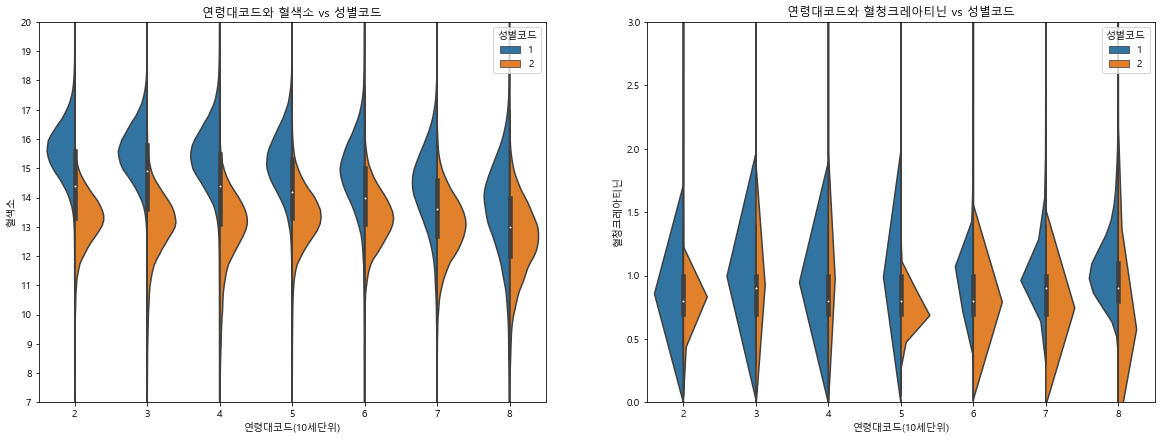

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.violinplot("연령대코드(10세단위)", "혈색소", hue = "성별코드", data = data, split = True, ax = ax[0])
ax[0].set_title("연령대코드와 혈색소 vs 성별코드")
ax[0].set_yticks(range(0, 25, 1))
ax[0].set_ylim(7, 20)

sns.violinplot("연령대코드(10세단위)", "혈청크레아티닌", hue = "성별코드", data = data, split = True, ax = ax[1])
ax[1].set_title("연령대코드와 혈청크레아티닌 vs 성별코드")
ax[1].set_ylim(0, 3)

plt.show()

From EDA, we could infer which variables are useful for each target variable:
- 성별: "신장(5Cm단위)", "체중(5Kg단위)", "흡연상태", "음주여부", "감마지티피", "혈색소", "혈청크레아티닌"
- 연령: "신장(5Cm단위)", "체중(5Kg단위)", "시력", "청력", "구강검진수검여부", "음주여부"

Feature Engineering
- Continuous variables have to be modified to become categorical.
- Y/N -> 1/0

In [36]:
data["Height_Range"] = pd.cut(data["신장(5Cm단위)"].astype(int), 5, labels = [0, 1, 2, 3, 4])
data["Weight_Range"] = pd.cut(data["체중(5Kg단위)"].astype(int), 5, labels = [0, 1, 2, 3, 4])
data["EL"] = pd.cut(data["시력(좌)"].astype(int), 4, labels = [0, 1, 2, 3])
data["ER"] = pd.cut(data["시력(우)"].astype(int), 4, labels = [0, 1, 2, 3])
data["G_GTP"] = pd.qcut(data["감마지티피"], 4, labels = [0, 1, 2, 3])
data["hmg"] = pd.qcut(data["혈색소"], 4, labels = [0, 1, 2, 3])
data["creatinine"] = pd.qcut(data["혈청크레아티닌"], 4, labels = [0, 1, 2, 3])

In [37]:
data["흡연상태"].replace({1: 0, 2: 2, 3: 1}, inplace = True)
data["음주여부"].replace({"Y": 1, "N": 0}, inplace = True)
data["구강검진수검여부"].replace({"Y": 1, "N": 0}, inplace = True)
data["청력(좌)"].replace({1: 1, 2: 0}, inplace = True)
data["청력(우)"].replace({1: 1, 2: 0}, inplace = True)

In [38]:
data["흡연상태"] = data["흡연상태"].astype(int)
data["청력(좌)"] = data["청력(좌)"].astype(int)
data["청력(우)"] = data["청력(우)"].astype(int)

In [39]:
data["성별코드"].replace({1: 0, 2: 1}, inplace = True)
data["연령대코드(10세단위)"].replace({2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}, inplace = True)

Modelling
- Prepare the data by splitting it accordingly.
- Use appropriate features for respective target variables.

In [40]:
y_sex = ["성별코드"]
y_age = ["연령대코드(10세단위)"]

Xfeatures_sex = ["Height_Range", "Weight_Range", "흡연상태", "음주여부", "G_GTP", "hmg", "creatinine"]
Xfeatures_age = ["Height_Range", "Weight_Range", "EL", "ER", "청력(좌)", "청력(우)", "구강검진수검여부", "음주여부"]

In [41]:
#train and test split
mask = data["가입자일련번호"] % 10 == 5
train_data = data[~mask]
test_data = data[mask]

In [62]:
X_sex_train = train_data[Xfeatures_sex]
X_age_train = train_data[Xfeatures_age]
y_sex_train = train_data[y_sex]
y_age_train = train_data[y_age]

X_sex_test = test_data[Xfeatures_sex]
X_age_test = test_data[Xfeatures_age]
y_sex_test = test_data[y_sex]
y_age_test = test_data[y_age]

In [64]:
LR = LogisticRegression()
LR.fit(X_sex_train, y_sex_train)
LRpredict_sex = LR.predict(X_sex_test)
print("Logistic Regression accuracy for sex: ", metrics.accuracy_score(LRpredict_sex, y_sex_test))

LR.fit(X_age_train, y_age_train)
LRpredict_age = LR.predict(X_age_test)
print("Logistic Regression accuracy for age: ", metrics.accuracy_score(LRpredict_age, y_age_test))

Logistic Regression accuracy for sex:  0.94543
Logistic Regression accuracy for age:  0.32255


In [65]:
KN = KNeighborsClassifier()
KN.fit(X_sex_train, y_sex_train)
KNpredict_sex = KN.predict(X_sex_test)
print("KNN Classifier accuracy for sex: ", metrics.accuracy_score(KNpredict_sex, y_sex_test))

KN.fit(X_age_train, y_age_train)
KNpredict_age = KN.predict(X_age_test)
print("KNN Classifier accuracy for age: ", metrics.accuracy_score(KNpredict_age, y_age_test))

KNN Classifier accuracy for sex:  0.94172
KNN Classifier accuracy for age:  0.24959


In [66]:
DT = DecisionTreeClassifier()
DT.fit(X_sex_train, y_sex_train)
DTpredict_sex = DT.predict(X_sex_test)
print("Decision Tree Classifier accuracy for sex: ", metrics.accuracy_score(DTpredict_sex, y_sex_test))

DT.fit(X_age_train, y_age_train)
DTpredict_age = DT.predict(X_age_test)
print("Decision Tree Classifier accuracy for age: ", metrics.accuracy_score(DTpredict_age, y_age_test))

Decision Tree Classifier accuracy for sex:  0.94811
Decision Tree Classifier accuracy for age:  0.3286


In [67]:
RF = RandomForestClassifier()
RF.fit(X_sex_train, y_sex_train)
RFpredict_sex = RF.predict(X_sex_test)
print("Random Forest Classifier accuracy for sex: ", metrics.accuracy_score(RFpredict_sex, y_sex_test))

RF.fit(X_age_train, y_age_train)
RFpredict_age = RF.predict(X_age_test)
print("Random Forest Classifier accuracy for age: ", metrics.accuracy_score(RFpredict_age, y_age_test))

Random Forest Classifier accuracy for sex:  0.94817
Random Forest Classifier accuracy for age:  0.32843


In [68]:
LGBM = LGBMClassifier()
LGBM.fit(X_sex_train, y_sex_train)
LGBMpredict_sex = LGBM.predict(X_sex_test)
print("LightGBM Classifier accuracy for sex: ", metrics.accuracy_score(LGBMpredict_sex, y_sex_test))

LGBM.fit(X_age_train, y_age_train)
LGBMpredict_age = LGBM.predict(X_age_test)
print("LightGBM Classifier accuracy for age: ", metrics.accuracy_score(LGBMpredict_age, y_age_test))

LightGBM Classifier accuracy for sex:  0.94848
LightGBM Classifier accuracy for age:  0.32857
